#### Imports 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
import os
from PIL import Image

from tensorflow.keras import layers, models
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow import keras

#### Importing Data

In [2]:
def train_df(tr_path):
    classes, class_paths = zip(*[(label, os.path.join(tr_path, label, image))
                                 for label in os.listdir(tr_path) if os.path.isdir(os.path.join(tr_path, label))
                                 for image in os.listdir(os.path.join(tr_path, label))]) 
    tr_df = pd.DataFrame({"Class Path": class_paths, "Class": classes})
    return tr_df

In [3]:
def test_df(ts_path):
    classes, class_paths = zip(*[(label, os.path.join(ts_path, label, image))
                                 for label in os.listdir(ts_path) if os.path.isdir(os.path.join(ts_path, label))
                                 for image in os.listdir(os.path.join(ts_path, label))])
    ts_df = pd.DataFrame({"Class Path": class_paths, "Class": classes})
    return ts_df

In [4]:
tr_df = train_df(r"Data\Training")
ts_df = test_df(r"Data\Testing")

In [5]:
tr_df

,Class Path,Class
0,Data\Training\glioma\Tr-glTr_0000.jpg,glioma
1,Data\Training\glioma\Tr-glTr_0001.jpg,glioma
2,Data\Training\glioma\Tr-glTr_0002.jpg,glioma
3,Data\Training\glioma\Tr-glTr_0003.jpg,glioma
4,Data\Training\glioma\Tr-glTr_0004.jpg,glioma
...,...,...
5707,Data\Training\pituitary\Tr-pi_1452.jpg,pituitary
5708,Data\Training\pituitary\Tr-pi_1453.jpg,pituitary
5709,Data\Training\pituitary\Tr-pi_1454.jpg,pituitary
5710,Data\Training\pituitary\Tr-pi_1455.jpg,pituitary


In [6]:
ts_df

,Class Path,Class
0,Data\Testing\glioma\Te-glTr_0000.jpg,glioma
1,Data\Testing\glioma\Te-glTr_0001.jpg,glioma
2,Data\Testing\glioma\Te-glTr_0002.jpg,glioma
3,Data\Testing\glioma\Te-glTr_0003.jpg,glioma
4,Data\Testing\glioma\Te-glTr_0004.jpg,glioma
...,...,...
1306,Data\Testing\pituitary\Te-pi_0295.jpg,pituitary
1307,Data\Testing\pituitary\Te-pi_0296.jpg,pituitary
1308,Data\Testing\pituitary\Te-pi_0297.jpg,pituitary
1309,Data\Testing\pituitary\Te-pi_0298.jpg,pituitary


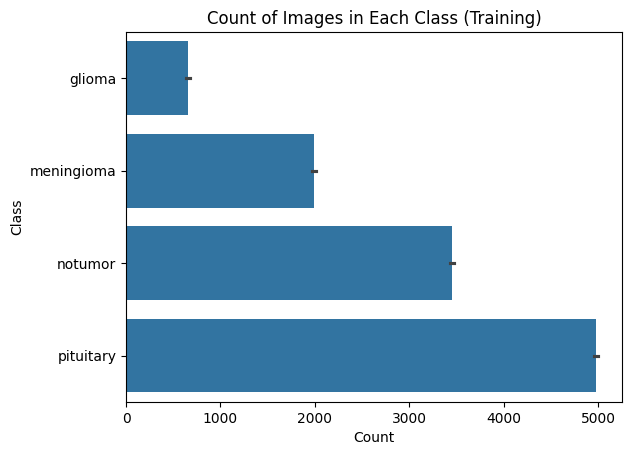

In [7]:
# Count of images in training dataset
plt.figure()
sns.barplot(tr_df["Class"])
plt.xlabel("Count")
plt.ylabel("Class")
plt.title("Count of Images in Each Class (Training)")
plt.show()

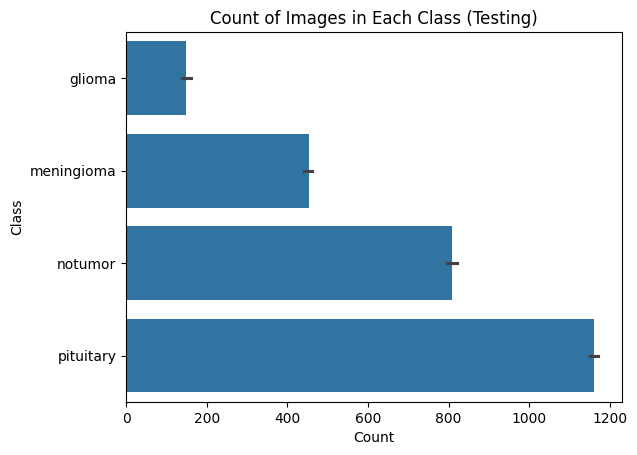

In [8]:
# Count of images in the training daaset
plt.figure()
sns.barplot(ts_df["Class"])
plt.xlabel("Count")
plt.ylabel("Class")
plt.title("Count of Images in Each Class (Testing)")
plt.show()

#### Data Preprocessing

In [9]:
batch_size = 32
img_size = (299,299)

_gen = ImageDataGenerator(rescale=1/255)

ts_gen = ImageDataGenerator(rescale=1/255)

tr_gen = _gen.flow_from_dataframe(tr_df, x_col="Class Path", 
                                  y_col="Class",
                                  batch_size=batch_size, 
                                  target_size=img_size,)

ts_gen = ts_gen.flow_from_dataframe(ts_df, x_col="Class Path",
                                    y_col="Class", 
                                    batch_size=16, 
                                    target_size=img_size, 
                                    shuffle=True)

# set shuffle equal to True simply for the picture

Found 5712 validated image filenames belonging to 4 classes.
Found 1311 validated image filenames belonging to 4 classes.


In [10]:
# Use annomoly detection, the notumor images to the tumor images. Could tell us where the tumor is.

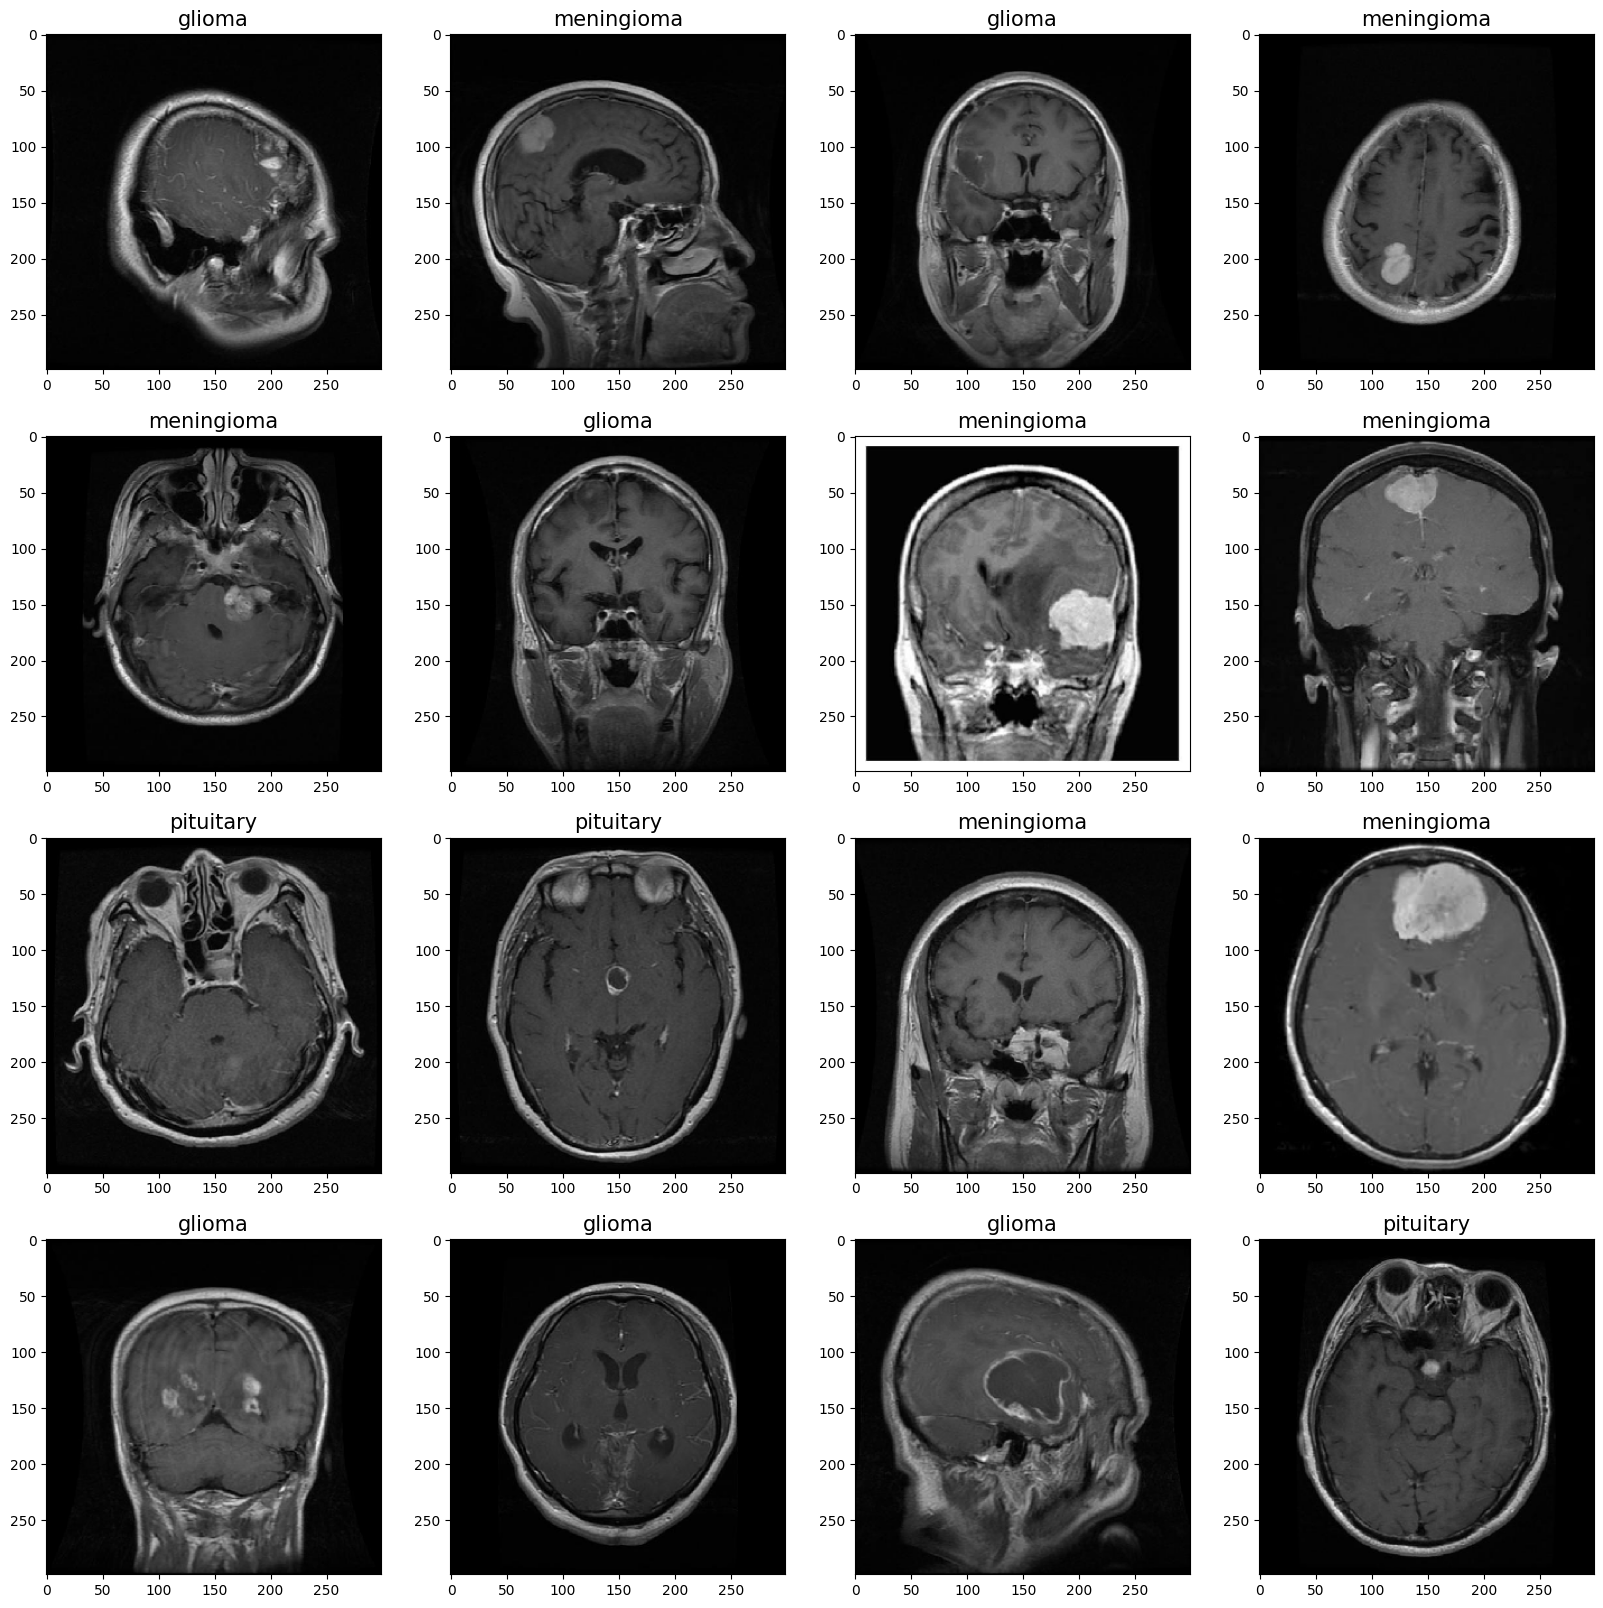

In [11]:
class_dict = tr_gen.class_indices
classes = list(class_dict.keys())
images, labels = next(ts_gen)

plt.figure(figsize=(20,20))
for i, (image,label) in enumerate(zip(images, labels)):
    plt.subplot(4,4, i+1)
    plt.imshow(image)
    class_name = classes[np.argmax(label)]
    plt.title(class_name, color="k", fontsize=15)
plt.show()

In [12]:
batch_size = 32
img_size = (299,299)

_gen = ImageDataGenerator(rescale=1/255)

ts_gen = ImageDataGenerator(rescale=1/255)

tr_gen = _gen.flow_from_dataframe(tr_df, x_col="Class Path", 
                                  y_col="Class",
                                  batch_size=batch_size,
                                  target_size=img_size,)

ts_gen = ts_gen.flow_from_dataframe(ts_df, x_col="Class Path",
                                    y_col="Class", 
                                    batch_size=16, 
                                    target_size=img_size, 
                                    shuffle=False)

# set shuffle back to false for model and confusion matrix 
# if set to true, then messes up confusion matrix as true labels 
# are also shuffled with the images. 

Found 5712 validated image filenames belonging to 4 classes.
Found 1311 validated image filenames belonging to 4 classes.


In [13]:
class_dict = tr_gen.class_indices
classes = list(class_dict.keys())
images, labels = next(ts_gen)

#### Initial CNN

In [14]:
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation="relu", input_shape=(299,299,3)),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation="relu"),
    layers.Dense(4, activation="softmax")
])

model.compile(optimizer="adam",
              loss="categorical_crossentropy",
              metrics=["accuracy"])
model.fit(tr_gen, epochs=5, batch_size=64)
test_loss, test_acc = model.evaluate(ts_gen, verbose=2)
print("Loss:", test_loss)
print("Accuracy:", test_acc)

C:\Users\jalen\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\Users\jalen\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
179/179 ━━━━━━━━━━━━━━━━━━━━ 130s 716ms/step - accuracy: 0.8148 - loss: 0.7939
Epoch 2/5
179/179 ━━━━━━━━━━━━━━━━━━━━ 45s 249ms/step - accuracy: 0.9695 - loss: 0.0962
Epoch 3/5
179/179 ━━━━━━━━━━━━━━━━━━━━ 47s 260ms/step - accuracy: 0.9944 - loss: 0.0253
Epoch 4/5
179/179 ━━━━━━━━━━━━━━━━━━━━ 48s 266ms/step - accuracy: 0.9982 - loss: 0.0079
Epoch 5/5
179/179 ━━━━━━━━━━━━━━━━━━━━ 45s 249ms/step - accuracy: 1.0000 - loss: 0.0016
82/82 - 32s - 393ms/step - accuracy: 0.9481 - loss: 0.2048
Loss: 0.2048499584197998
Accuracy: 0.9481312036514282


82/82 ━━━━━━━━━━━━━━━━━━━━ 5s 64ms/step


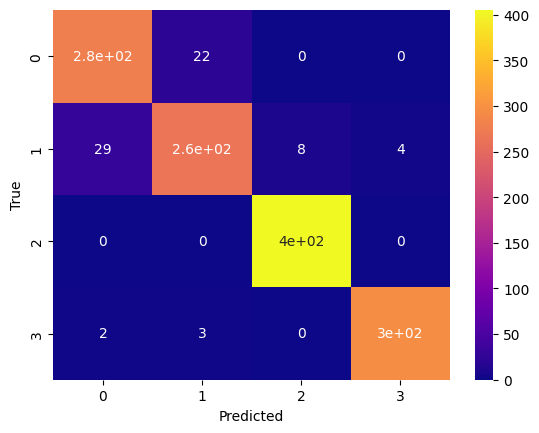

              precision    recall  f1-score   support

      glioma       0.90      0.93      0.91       300
  meningioma       0.91      0.87      0.89       306
     notumor       0.98      1.00      0.99       405
   pituitary       0.99      0.98      0.98       300

    accuracy                           0.95      1311
   macro avg       0.95      0.94      0.94      1311
weighted avg       0.95      0.95      0.95      1311



In [15]:
y_pred = np.argmax(model.predict(ts_gen), axis=-1)
y_true = ts_gen.classes
cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm, annot=True, cmap="plasma")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

print(classification_report(y_true, y_pred, target_names=classes))

#### Hyperparameter Tuning

In [16]:
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation="relu", input_shape=(299,299,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3)),
    layers.Flatten(),
    layers.Dropout(0.1),
    layers.Dense(64, activation="relu"),
    layers.Dense(4, activation="softmax")
])

model.compile(optimizer="adam",
              loss="categorical_crossentropy",
              metrics=["accuracy"])
model.fit(tr_gen, epochs=5, batch_size=64)
test_loss, test_acc = model.evaluate(ts_gen, verbose=2)
print("Loss:", test_loss)
print("Accuracy:", test_acc)

C:\Users\jalen\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
179/179 ━━━━━━━━━━━━━━━━━━━━ 119s 658ms/step - accuracy: 0.6845 - loss: 2.4152
Epoch 2/5
179/179 ━━━━━━━━━━━━━━━━━━━━ 133s 743ms/step - accuracy: 0.8668 - loss: 0.3304
Epoch 3/5
179/179 ━━━━━━━━━━━━━━━━━━━━ 111s 618ms/step - accuracy: 0.9317 - loss: 0.1770
Epoch 4/5
179/179 ━━━━━━━━━━━━━━━━━━━━ 110s 612ms/step - accuracy: 0.9641 - loss: 0.0897
Epoch 5/5
179/179 ━━━━━━━━━━━━━━━━━━━━ 109s 608ms/step - accuracy: 0.9862 - loss: 0.0456
82/82 - 10s - 116ms/step - accuracy: 0.9222 - loss: 0.2295
Loss: 0.22950834035873413
Accuracy: 0.9221968054771423


82/82 ━━━━━━━━━━━━━━━━━━━━ 10s 120ms/step


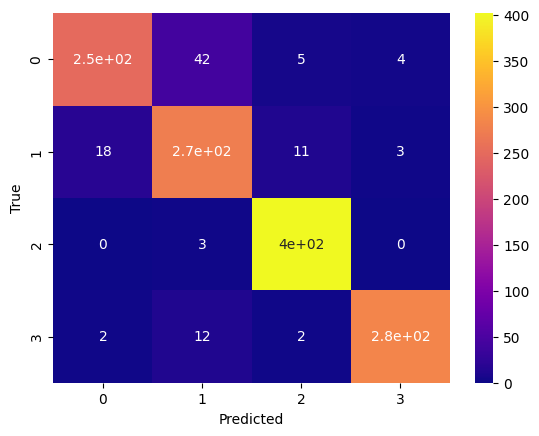

              precision    recall  f1-score   support

      glioma       0.93      0.83      0.88       300
  meningioma       0.83      0.90      0.86       306
     notumor       0.96      0.99      0.97       405
   pituitary       0.98      0.95      0.96       300

    accuracy                           0.92      1311
   macro avg       0.92      0.92      0.92      1311
weighted avg       0.92      0.92      0.92      1311



In [17]:
y_pred = np.argmax(model.predict(ts_gen), axis=-1)
y_true = ts_gen.classes
cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm, annot=True, cmap="plasma")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

print(classification_report(y_true, y_pred, target_names=classes))

#### Anomaly Dectection Using Isolation Forests

In [51]:
feature_extractor = tf.keras.Model(
    inputs=model.inputs,
    outputs=model.get_layer(index=-2).output 
    # index=-2 gives Dense(64) layer
)

# building feature extractor from trained CNN

In [52]:
model.inputs

[<KerasTensor shape=(None, 299, 299, 3), dtype=float32, sparse=False, ragged=False, name=keras_tensor_12>]

In [53]:
print(tr_gen.class_indices)

{'glioma': 0, 'meningioma': 1, 'notumor': 2, 'pituitary': 3}


In [54]:
# Extract features from all Normal training images
normal_class_index = tr_gen.class_indices["notumor"]

normal_features = []

for x, y in tr_gen:
    normal_indices = np.where(np.argmax(y, axis=1) == normal_class_index)[0]
    print(normal_indices)
    if len(normal_indices) == 0:
        continue

    imgs = x[normal_indices]
    feats = feature_extractor.predict(imgs)
    normal_features.append(feats)

    if len(normal_features) * tr_gen.batch_size >= tr_gen.n:
        break

normal_features = np.vstack(normal_features)
print("Feature Shape:", normal_features.shape)


[ 5 10 12 20 22 27 28 30]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step
[ 1 12 18 19 25 28]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step
[ 0  1  4  6  7 11 13 16 17 28]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
[ 0  1  2  7  9 10 15 18 19 29 31]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
[ 0  2  5 14 16 18 19 23 25 28 29]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
[ 5 15 19 20 24]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
[ 2  3  9 11 18 20 23 24 25 30]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
[ 0  3  4  7 11 21 24 26]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
[11 14 16 21 23 27]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
[ 1  7 13 15 24 25 28 29]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
[ 6 10 12 13 18 22 30]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
[ 0  6 11 17 22 23 24 30]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
[ 0  2  6  8  9 10 12 21 24 25 26]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
[ 0  1  3  7 14 16 22 30 31]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
[ 1  4  5 10 12 14 18 19]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
[ 3 11 15

In [55]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
normal_features_scaled = scaler.fit_transform(normal_features)

In [56]:
# Train the Isolation Forest

from sklearn.ensemble import IsolationForest

iso = IsolationForest(
    contamination = 0.05, # percentage of anomalies 
    random_state=42
)

iso.fit(normal_features_scaled)

,n_estimators,100
,max_samples,'auto'
,contamination,0.05
,max_features,1.0
,bootstrap,False
,n_jobs,None
,random_state,42
,verbose,0
,warm_start,False


In [57]:
# Use it to detext anomalies on any image

def anomaly_score(img):

    feat = feature_extractor.predict(img[None,...])
    feat_scaled = scaler.transform(feat)
    
    score = -iso.decision_function(feat)[0] # higher = more anomalous
    label = iso.predict(feat)[0]            # -1 = anomaly, 1 = normal
    return score, label

In [58]:
ts_gen.reset()

for batch_images, batch_labels in ts_gen:
    for image, tum in zip(batch_images, batch_labels):

        score, pred = anomaly_score(image)
        new_label = np.where(tum == 1)[0][0]

        if pred == -1 and new_label != 2:
            print("Correct Tumor")
        elif pred == -1 and new_label == 2:
            print("Incorrect Tumor")
        elif pred == 1 and new_label != 2:
            print("Incorrect Okie Dokie")
        elif pred == 1 and new_label == 2:
            print("Correct Okie Dokie")

    if ts_gen.batch_index == 0:   # generator wrapped
        break

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
Correct Tumor
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
Correct Tumor
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
Correct Tumor
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
Correct Tumor
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
Correct Tumor
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
Correct Tumor
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
Correct Tumor
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
Correct Tumor
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
Correct Tumor
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
Correct Tumor
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
Correct Tumor
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
Correct Tumor
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
Correct Tumor
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
Correct Tumor
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
Correct Tumor
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Correct Tumor
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
Correct Tumor
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
Correct Tumor
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
Correct Tumor
1/1 ━━━━━━━━

#### Anonaly Detection, autoencoders. 

In [ ]:
# laten_dim = 64

# encoder = models.Sequential([
#     layers.Conv2D(64, (3,3), activation="relu", input_shape=(299,299,3)),
#     layers.Conv2D(32, (3,3), activation="relu"),
#     layers.Conv2D(16, (3,3), activation="relu"),
#     layers.Flatten(),
#     layers.Dense(64, activation="relu"),
#     layers.Dense(32, activation="relu"),
#     layers.Dense(laten_dim*2)
# ], name="encoder")

C:\Users\jalen\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# class Sampling(layers.Layer):
#     def call(self, z_params):
        
#         z_mean, z_log_var = tf.split(z_params, 2, axis=1)
#         # The endoder outputs (z_mean, z_log_var) stacked together,
#         # this line splits them into two tensors

#         eps = tf.random.normal(shape=tf.shape(z_mean))
#         # Generate random noise with the same shape as z_mean
        
#         return z_mean + tf.exp(0.5 * z_log_var) * eps
#         # This is the reparameterization trick:
#         #  - tf.exp = standard deviation
#         #  - muttiply by noise to introduce randomness
#         #  - add mean to shift the distribution
    
"""
Reparameterization trick is required to make the VAE trainable. 

It takes the encoder's output [z_mean, z_log_var], and uses them 
 to produce a vector to be fed into the decoder 

This needs to be done becasue VAE learns distribution, not a single point,
 the model then samples a point from this distribution

Sampling is not differentiable, and since NNs train on gradients, we need
 to rewrite the sampling in a differentiable way (z= mean + std * eps)

"""

"\nReparameterization trick is required to make the VAE trainable. \n\nIt takes the encoder's output [z_mean, z_log_var], and uses them \n to produce a vector to be fed into the decoder \n\nThis needs to be done becasue VAE learns distribution, not a single point,\n the model then samples a point from this distribution\n\nSampling is not differentiable, and since NNs train on gradients, we need\n to rewrite the sampling in a differentiable way (z= mean + std * eps)\n\n"

In [ ]:
# decoder = models.Sequential([
#     layers.Dense(294*294*64, activation="relu", input_shape=(laten_dim,)),
#     layers.Reshape((294, 294, 64)),
#     layers.Conv2DTranspose(64, 2, activation="relu"),
#     layers.Conv2DTranspose(32, 2, activation="relu"),
#     layers.Conv2DTranspose(16, 2, activation="relu"),
#     layers.Conv2DTranspose(3, 3, activation="sigmoid"),
# ], name="decoder")

In [ ]:
# decoder = models.Sequential([
#     layers.Dense(19*19*64, activation="relu", input_shape=(laten_dim,)),
#     layers.Reshape((19,19,64)),
#     layers.Conv2DTranspose(64, 3, strides=2, padding="same", activation="relu"),
#     layers.Conv2DTranspose(32, 3, strides=2, padding="same", activation="relu"),
#     layers.Conv2DTranspose(16, 3, strides=2, padding="same", activation="relu"),
#     layers.Conv2DTranspose(8, 3, strides=2, padding="same", activation="relu"),
#     layers.Conv2D(3, 3, padding="same", activation="sigmoid"),
#     layers.Cropping2D(((2,3), (2,3))),
# ], name="decoder")

C:\Users\jalen\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# class VAE(keras.Model):
#     def __init__(self, encoder, decoder):
#         super().__init__()
#         self.encoder = encoder
#         self.decoder = decoder
#         self.sampler = Sampling()

#         self.beta = tf.Variable(0.0, trainable=False, dtype=tf.float32)
    
#     def train_step(self, data):
        
#         x, _ = data

#         self.beta.assign(tf.minimum(1.0, self.beta + 0.001))

#         with tf.GradientTape() as tape:
#             z_params = self.encoder(x)
#             z_mean, z_log_var = tf.split(z_params, 2, axis=1)

#             z_log_var = tf.clip_by_value(z_log_var, -10.0, 10.0)

#             z_params_clipped = tf.concat([z_mean, z_log_var], axis=1)

#             z = self.sampler(z_params_clipped)

#             reconstruction = self.decoder(z)

#             recon_loss = tf.reduce_mean(tf.square(x -reconstruction))
#             recon_loss = tf.reduce_sum(recon_loss, axis=list(range(1, len(recon_loss.shape))))
#             recon_loss = tf.reduce_mean(tf.reduce_sum(recon_loss))

#             kl_loss = -0.5 * tf.reduce_mean(
#                 tf.reduce_sum(
#                     1 + z_log_var - tf.square(z_mean) - tf.exp(z_log_var), axis=1)
#             )

        #     #beta = 0.1

        #     total_loss = recon_loss + self.beta * kl_loss
    
        # grads = tape.gradient(total_loss, self.trainable_weights)
        # self.optimizer.apply_gradients(zip(grads, self.trainable_weights))

        # return {"loss": total_loss,
        #         "reconstruction_loss": recon_loss,
        #         "kl_loss": kl_loss
        #         }

In [ ]:
# vae = VAE(encoder, decoder)
# vae.compile(optimizer="adam")
# vae.fit(tr_gen, epochs=1, batch_size=64)
# vae.predict(ts_gen)

179/179 ━━━━━━━━━━━━━━━━━━━━ 430s 2s/step - kl_loss: 2.3454e-05 - loss: 0.0254 - reconstruction_loss: 0.0254


NotImplementedError: Exception encountered when calling VAE.call().

[1mModel VAE does not have a `call()` method implemented.[0m

Arguments received by VAE.call():
  • args=('tf.Tensor(shape=(16, 299, 299, 3), dtype=float32)',)
  • kwargs=<class 'inspect._empty'>

The mse loss is alright, but the kl_loss is being collapsed down to zero, nmeaning that it's getting overshadowed by the reconstruction loss, fix that by giving it a weight. Also, change the latent_dim to something bigger, maybe 16 or 32? the 2-dim sapce is too small for the images to actually learn something. 